In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting parameters
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (16, 8)

# Question to answer: 

### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Pulling in data and cleaning/preparing it slightly 

In [2]:
df = pd.read_csv('logs_data.csv', index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [4]:
cohorts = pd.read_csv('cohorts_data.csv')
cohorts = cohorts.drop(columns = ['Unnamed: 0', 'slack', 'created_at', 'updated_at', 'deleted_at'])
combined_df = pd.merge(df, cohorts, how = 'outer', left_on = 'cohort_id', right_on= 'id')

In [5]:
combined_df

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id
0,0.0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,1.0,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,3.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,58.0,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Balboa,2015-11-03,2016-03-11,4.0
900225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Redwood,2017-07-31,2017-12-06,2.0
900226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Ada,2019-02-04,2019-06-16,3.0
900227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Io,2020-07-20,2021-01-21,2.0


In [6]:
def make_datetime_index(df):
    df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.set_index('datetime').sort_index()
    df = df.drop(columns= ['Unnamed: 0', 'date', 'time', 'id'])
    return df

In [7]:
df = make_datetime_index(combined_df)

In [8]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900229 entries, 2018-01-26 09:55:03 to NaT
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  float64
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847336 non-null  object 
 5   start_date  847336 non-null  object 
 6   end_date    847336 non-null  object 
 7   program_id  847336 non-null  float64
dtypes: float64(3), object(5)
memory usage: 61.8+ MB


#### Investigating the nulls in cohort_id to see if there is a noticable pattern.

In [61]:
no_cohort = df[df.cohort_id.isna()]
no_cohort = no_cohort.dropna(axis=0, subset=['ip'])

In [62]:
no_cohort.index.min(), no_cohort.index.max()

(Timestamp('2018-01-26 16:46:16'), Timestamp('2021-04-21 12:56:26'))

Comparing to the df datetime min and max

In [63]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

No difference, looking at the distribution of times for no_cohort access

<AxesSubplot:xlabel='datetime', ylabel='Count'>

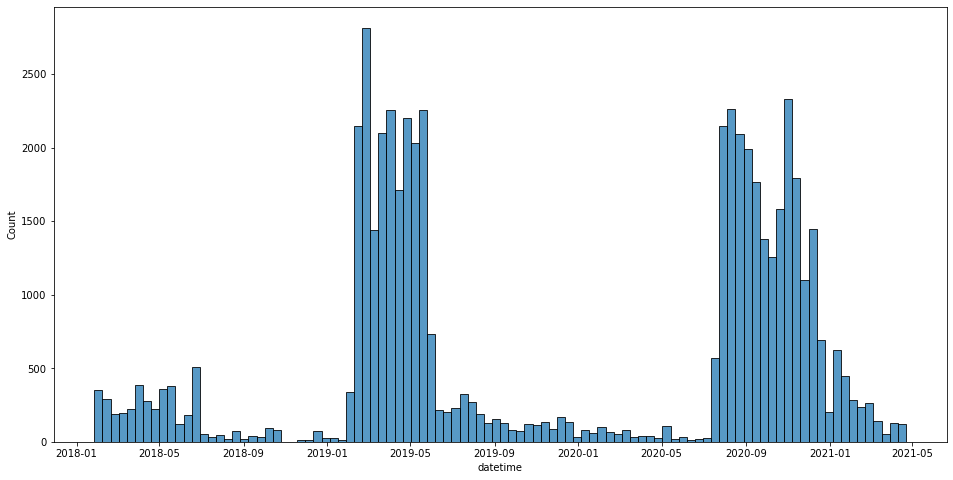

In [64]:
sns.histplot(data=no_cohort.index, bins = 100)

comparing to overall dataframe histplot

<AxesSubplot:xlabel='datetime', ylabel='Count'>

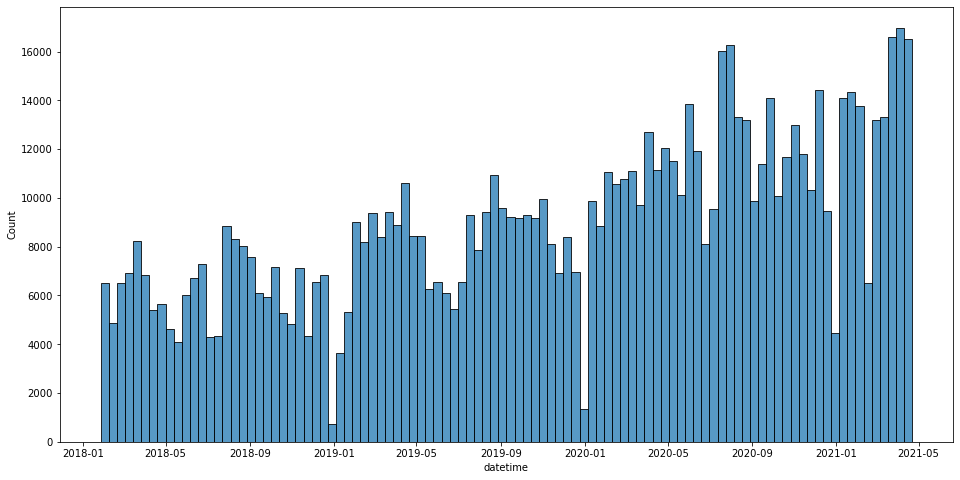

In [65]:
sns.histplot(data=df.index, bins =100)

Shows variation in the access times between no_cohort and df

In [66]:
no_cohort.user_id.value_counts()

354.0    2965
736.0    2358
363.0    2248
716.0    2136
368.0    2085
         ... 
644.0       6
663.0       4
62.0        4
176.0       3
89.0        3
Name: user_id, Length: 78, dtype: int64

Therea are 78 users who have no cohort.

In [67]:
no_cohort

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 16:46:16,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 16:46:24,spring/extra-features/form-validation,48.0,NaN,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 17:54:24,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 18:32:03,/,48.0,NaN,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 18:32:17,mysql/relationships/joins,48.0,NaN,97.105.19.61,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717.0,NaN,136.50.102.126,NaN,NaN,NaN,NaN
2021-04-21 12:49:02,javascript-ii/es6,717.0,NaN,136.50.102.126,NaN,NaN,NaN,NaN
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717.0,NaN,136.50.102.126,NaN,NaN,NaN,NaN
